Import dependencies.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

I will be using the Iris dataset for this assignment, which can be accessed via the seaborn library. Therefore, I will load the dataset from seaborn's datasets module for simplicity.

In [37]:
df = sns.load_dataset('iris')

Display dataset's shape (# of rows, # of columns)

In [38]:
df.shape

(150, 5)

Display dataset's information including columns, and their data types



In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


This dataset includes:

*   Numerical data: `sepal_length`, `sepal_width`, `petal_length`, and `petal_width`.
*   Categorical data: `species`.

Note: for `sepal_length`, `sepal_width`, `petal_length`, and `petal_width`, unit of measurement is centimeters.

source (dataset official website): https://archive.ics.uci.edu/dataset/53/iris.



Check if there are null values in the dataset

In [40]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

No null values, The dataset is clean yaaay 😁.



Display the first few rows of the dataset to view a sample of the dataset.

In [41]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Split the dataset in 2 variables, the numerical attribute(s) and the categorical attribute(s), because the following calculation and explorations may vary depending on the data type itself.

In [42]:
numerical_df = df.drop(columns=['species'])
species_series = df['species'] # The only categorical data present in the data set, so the data type resulting from this operator is a Series object.

# note that the original DataFrame is not altered because it can be used as a whole in the coming explorations and calculations.

For speices attribute, Examine the categories present in the dataset

In [43]:
species_series.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Check for inconsistencies in the dataset
specifically the numeric attributes, all of the attributes present represents a dimension, so it cannot be negative.

Inconsistencies may occur due to data corruption, human error during data entry or processing, etc...

In [44]:
for attr in numerical_df.columns:
  inconsistent_fields = numerical_df[attr] < 0

  if inconsistent_fields.any():
    print(f'Found inconsistencies for attribute {attr}')
    print(inconsistent_fields)
  else:
    print(f'For attribute {attr}, no inconsistencies found.')

# used print() just as an indicator for inconsistencies

For attribute sepal_length, no inconsistencies found.
For attribute sepal_width, no inconsistencies found.
For attribute petal_length, no inconsistencies found.
For attribute petal_width, no inconsistencies found.


As seen in the output, no inconsistancies for numerical attributes found in dataset 😁.

**Display statistical properties for both numercial and categorical data.**

For numerical data

In [45]:
numerical_df.describe()
# here the method show count of the values, the mean,
# standard deviantion, min and max values
# 1st, 2nd, and 3rd quartiles
# for each numerical attribute present in the dataset.

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [46]:
numerical_df.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [47]:
numerical_df.var() # Variance

sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64

In [48]:
numerical_df.cov() # Covariance

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [49]:
numerical_df.apply(lambda feat: feat.max() - feat.min()) # Range calculation

sepal_length    3.6
sepal_width     2.4
petal_length    5.9
petal_width     2.4
dtype: float64

In [50]:
numerical_df.skew() # Calculate skewness of the numerical data

sepal_length    0.314911
sepal_width     0.318966
petal_length   -0.274884
petal_width    -0.102967
dtype: float64

In [51]:
numerical_df.kurt() # Calculate kurtosis of the numerical data

sepal_length   -0.552064
sepal_width     0.228249
petal_length   -1.402103
petal_width    -1.340604
dtype: float64

In [52]:
numerical_df.corr() # Calculate the correlation between numerical features

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


For categorical data

Examine each category present in the dataset and its frequency.

In [53]:
species_series.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

For both data types, mode can be calculated using the `DataFrame.mode()` method.



In [54]:
df.mode()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.0,3.0,1.4,0.2,setosa
1,NaN,NaN,1.5,NaN,versicolor
2,NaN,NaN,NaN,NaN,virginica


Here for the mode value(s), multiple modes may occur and pandas displays it in a tabular form, so `NaN` values may be present in the table as for example here petal_length appears to have 2 modes while petal_width has 1 mode.

And now for data visualization

A bar plot for species and their count to represent the distribution of the data based on the category.

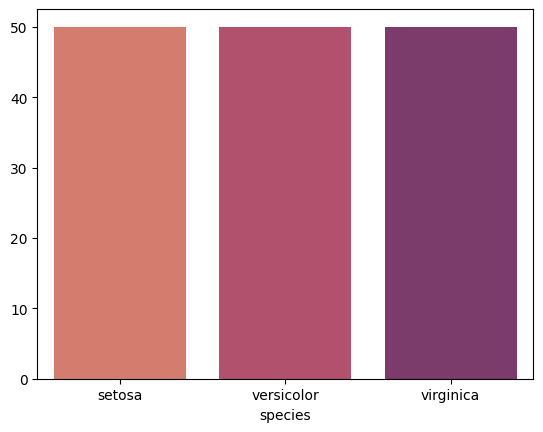

In [55]:
species_count = species_series.value_counts()

sns.barplot(x=species_count.index, y=species_count.values, hue=species_count.index, palette='flare')

plt.show()

Box plot for visualing statistical properties for numerical attributes (lengths and widths) and showing outliers (if any) for all species combined.

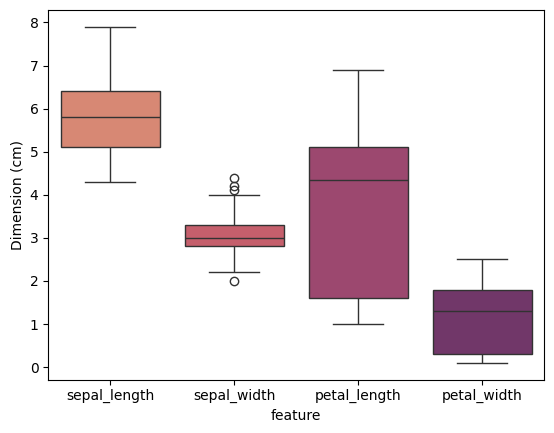

In [56]:
plt.xlabel('feature')
plt.ylabel('Dimension (cm)')
sns.boxplot(data=numerical_df, palette='flare')
plt.show()

Boxplots for each numerical feature separately by species (to provide a cleaner look based on the feature spearated by species)

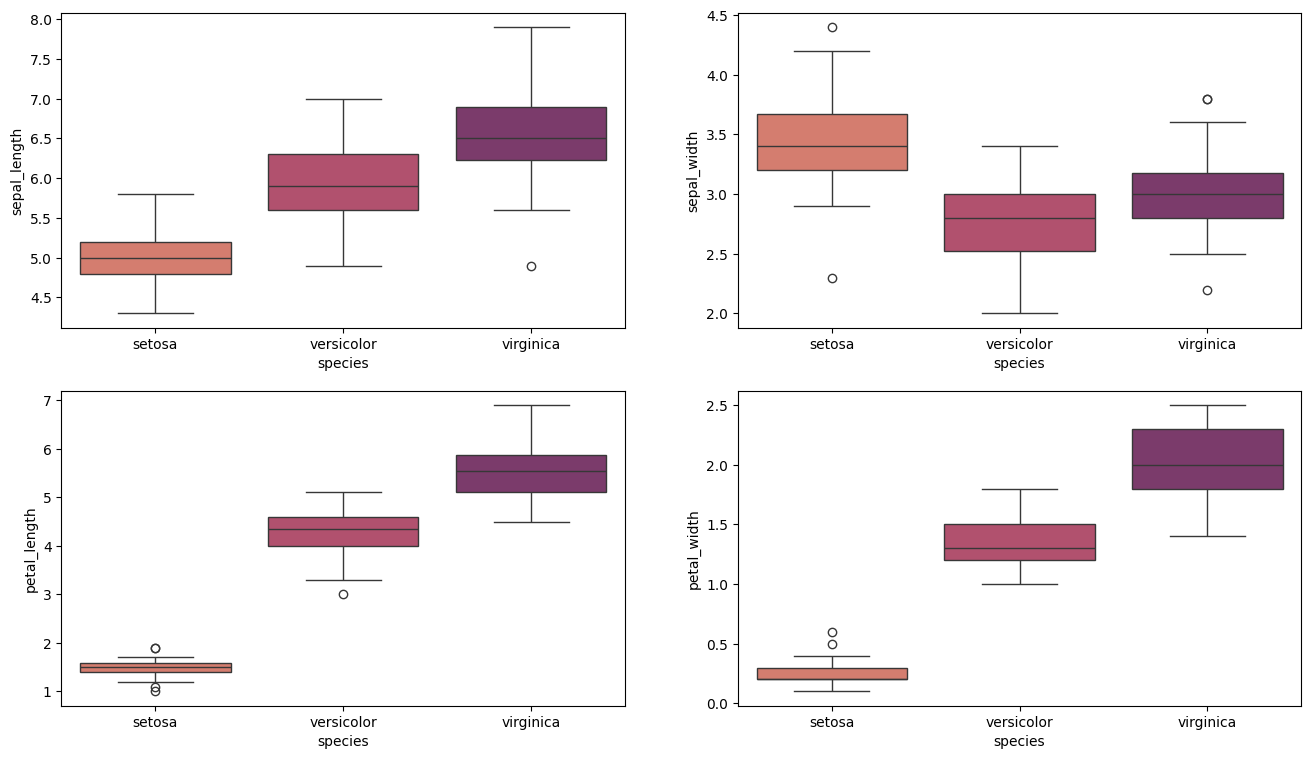

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))

for (ax, attr) in zip(axes.flatten(), numerical_df.columns):
  sns.boxplot(data=df, x='species', y=attr, orient='v', ax=ax, hue='species', palette='flare')

plt.show()

The boxplots reveal that Setosa species tend to have shorter and wider sepals and very short and narrow petals. Versicolor species are intermediate in most characteristics. Virginica species have the longest and widest petals, and sepal length is also the longest, but sepal width is comparable to Versicolor.

Heat map for representing correlation between features (attributes) in a graphically meaningful way

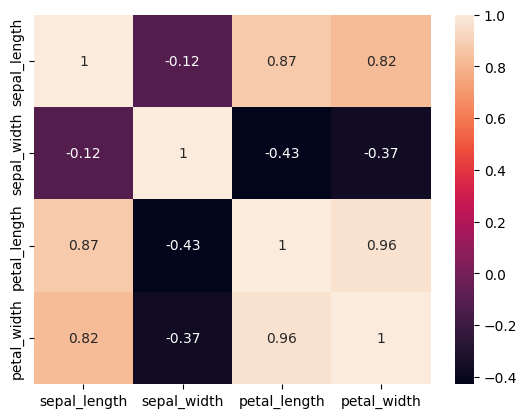

In [58]:
sns.heatmap(data=numerical_df.corr(), annot=True)

plt.show()

There is a high corelation between: `sepal_length` & `petal_length`, `sepal_length` & `petal_width`, and `petal_length` & `petal_width`.

Histplot showing the density distribution of length and width attributes

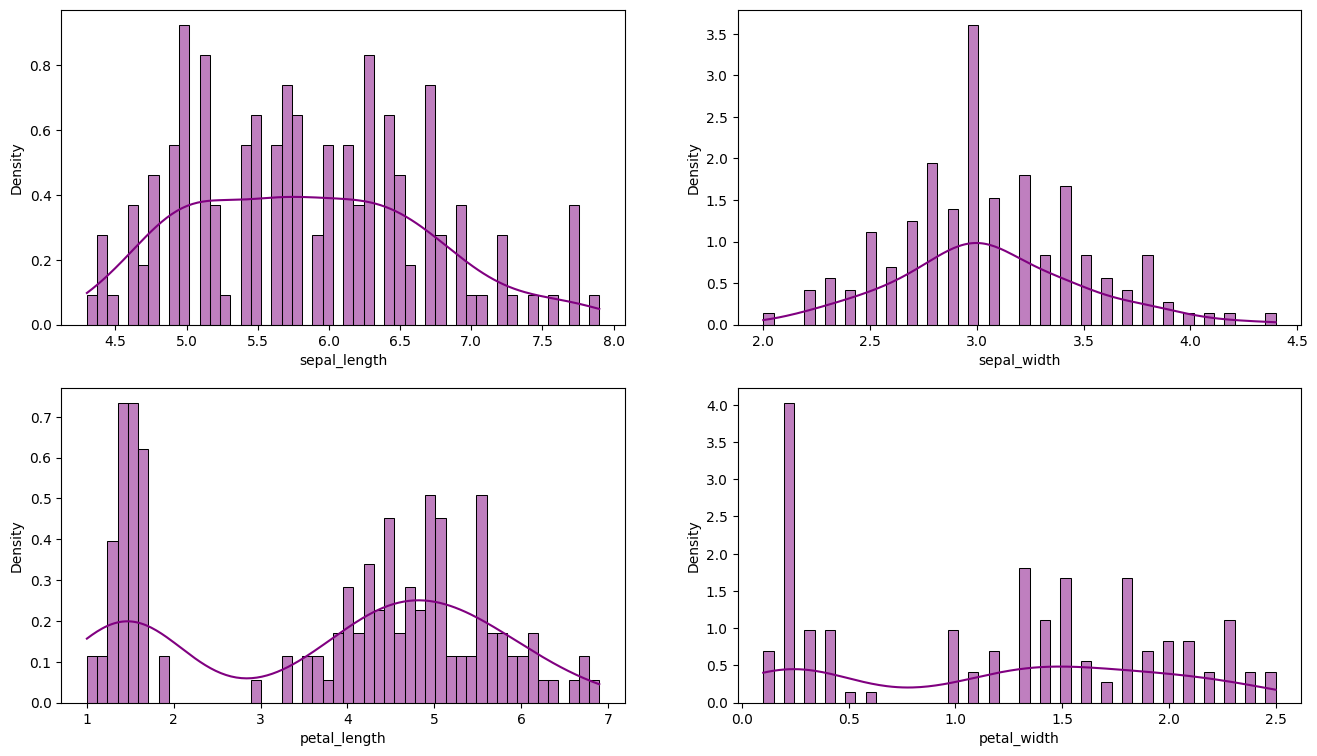

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))

for (ax, attr) in zip(axes.flatten(), numerical_df.columns):
  sns.histplot(data=df, x=attr, ax=ax, bins=50, stat='density', kde=True, color='purple')

plt.show()

The histograms and density plots indicate significant variability in the Iris dataset, likely reflecting the different species included. The bimodal nature of the petal measurements is particularly indicative of distinct species, as petal length and width are key differentiators among Iris species. The more unimodal but still variable distributions of sepal length and width suggest that while these measurements vary among Iris flowers, they may not be as distinctive for species classification as petal measurements.

Strip plots for each numerical feature for each type

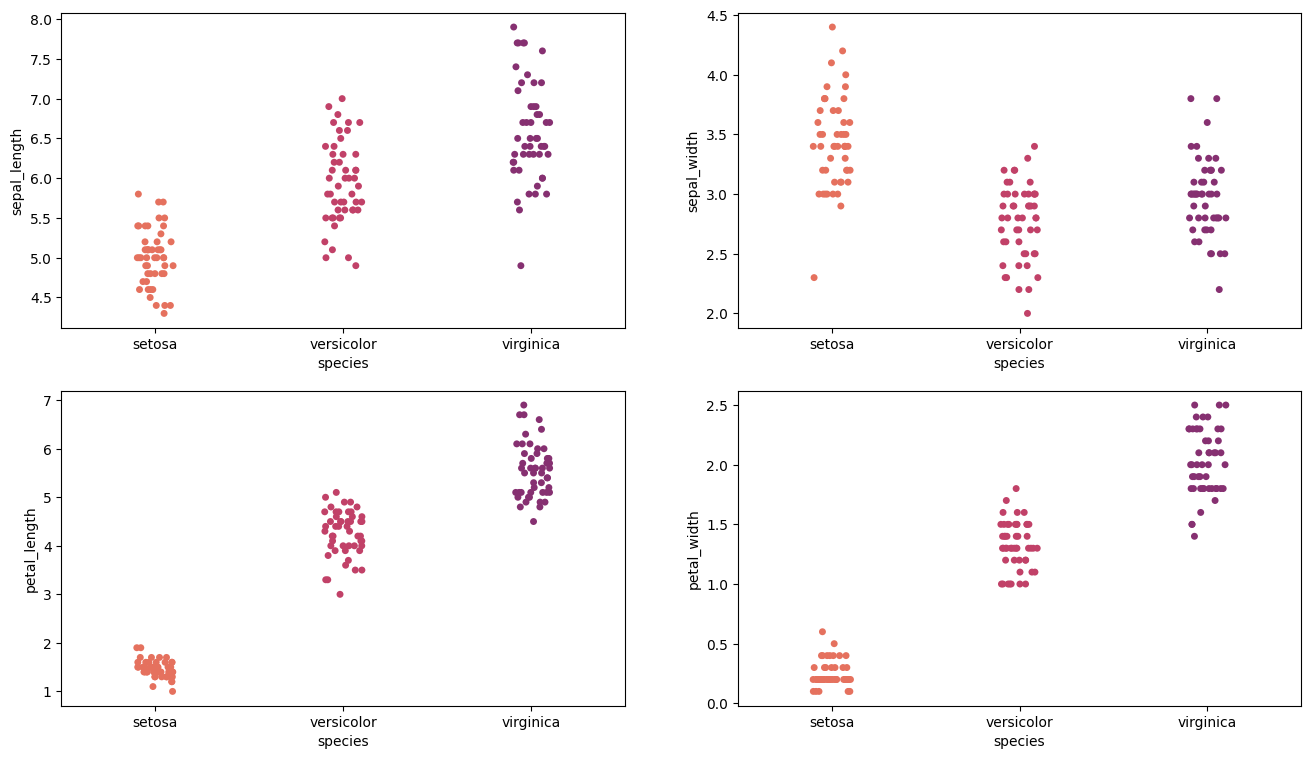

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))

for (ax, attr) in zip(axes.flatten(), numerical_df.columns):
  sns.stripplot(data=df, x='species', y=attr, ax=ax, hue='species', palette='flare')

plt.show()

Pair plot hued by species for visually exploring relationships between each pair of numerical attributes, useful for linear regression.

Given the small number of attributes, a pair plot for the purpose mentioned is good.

Default plot for each pair of attributes is the scatter plot, and for diagonal (each attribute with itself which is treated differently according to seaborn documentation) is the kde plot.

Source: https://seaborn.pydata.org/generated/seaborn.pairplot.html

<Figure size 1600x900 with 0 Axes>

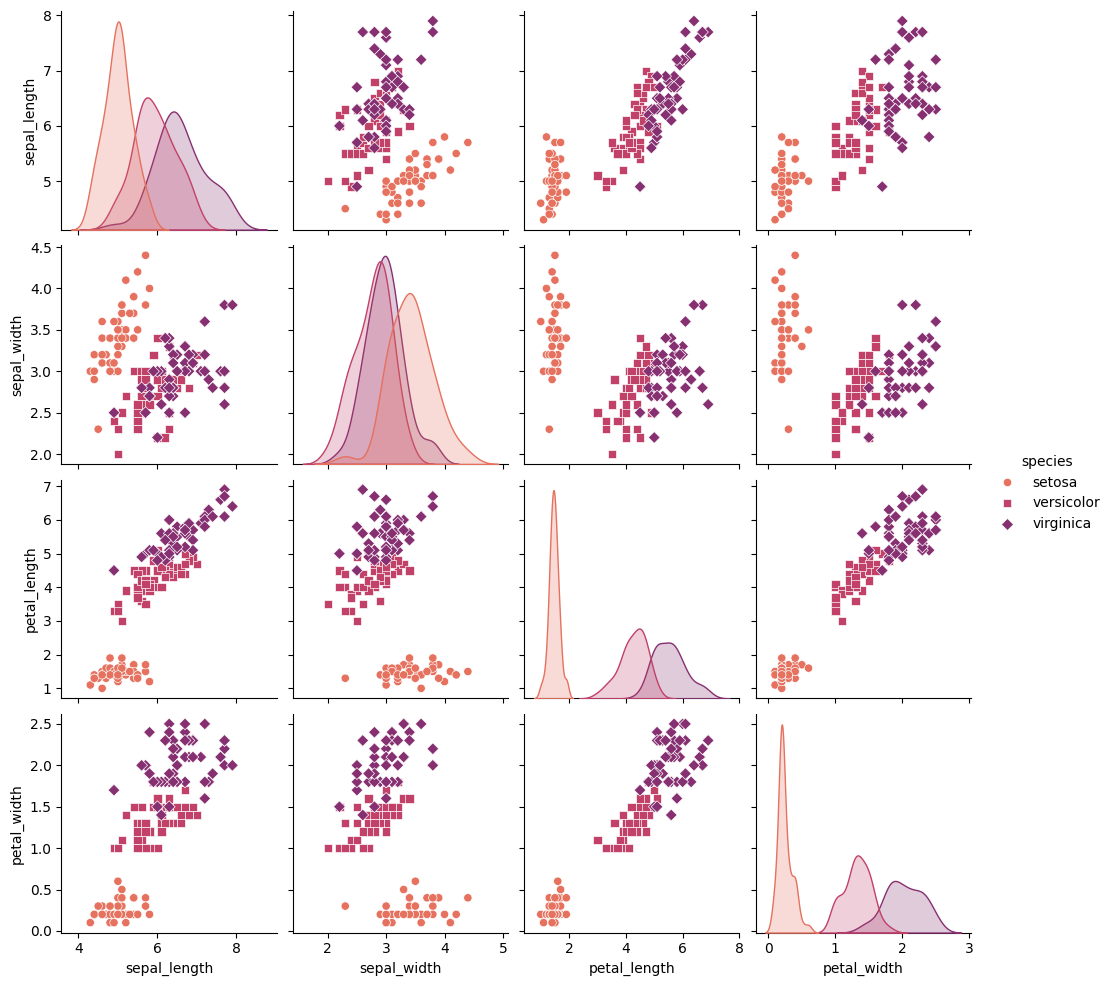

In [61]:
plt.figure(figsize=(16,9))

sns.pairplot(data=df, hue='species', markers=['o', 's', 'D'], palette='flare')

plt.show()

The scatter plots demonstrate clear distinctions between the species based on these four measurements, especially between setosa and the other two species. The setosa flowers tend to be smaller in petal length and width but have wider sepals. Versicolor and virginica have more overlap in their sepal dimensions but can be distinguished based on petal length and width, with virginica generally having larger petals. The scatter plots also suggest strong correlations between petal length and width for all species, and between sepal length and petal size for versicolor and virginica. These correlations are less pronounced for setosa, likely due to the limited range of petal sizes within that species.

**Important note: The following sections' benefits for the whole process depends on the Machine learning algorithm(s) being applied, but for the sake of the assignment, and for learning purposes, they were applied to the dataset.**



Normalizing or standardizing features.

In [64]:
# Normalization

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Copying the DataFrame to preserve the original data
df_normalized = df.copy()

# Selecting numeric columns to normalize
numeric_cols = numerical_df.columns

df_normalized[numeric_cols] = scaler.fit_transform(df_normalized[numeric_cols])
# Now df_normalized contains the normalized values, and df remains unchanged.

In [66]:
# display the head of the normalized dataset
df_normalized.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa


Encoding categorical variables (here `species`).

There are many encoding techniques to be applied, but here I applied the one-hot encoding to the `species` column (the only categorical variable in the dataset).

In [67]:
df_encoded = pd.get_dummies(df, columns=['species'])

The latter code will create three new columns in `df_encoded` (one for each species: `species_setosa`, `species_versicolor`
, and `species_virginica`) of type boolean representing if the record belongs to this category.

The original species column will be replaced by these new columns.

In [68]:
# display the head of the encoded dataset
df_encoded.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
